In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
weather = pd.read_csv(r"../datasets/weatherAUS5000.csv",index_col=0)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7,No
1,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3,No
2,2010-02-08,Adelaide,24.0,38.1,0.0,23.4,13.0,SE,39.0,NNE,...,19.0,36.0,24.0,1018.0,1016.0,NaN,NaN,32.4,37.4,No
3,2016-09-19,Adelaide,6.7,16.4,0.4,NaN,NaN,N,31.0,N,...,15.0,65.0,40.0,1014.4,1010.0,NaN,NaN,11.2,15.9,No
4,2014-03-05,Adelaide,16.7,24.8,0.0,6.6,11.7,S,37.0,S,...,24.0,61.0,48.0,1019.3,1018.9,NaN,NaN,20.8,23.7,No


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5000 non-null   object 
 1   Location       5000 non-null   object 
 2   MinTemp        4979 non-null   float64
 3   MaxTemp        4987 non-null   float64
 4   Rainfall       4950 non-null   float64
 5   Evaporation    2841 non-null   float64
 6   Sunshine       2571 non-null   float64
 7   WindGustDir    4669 non-null   object 
 8   WindGustSpeed  4669 non-null   float64
 9   WindDir9am     4651 non-null   object 
 10  WindDir3pm     4887 non-null   object 
 11  WindSpeed9am   4949 non-null   float64
 12  WindSpeed3pm   4919 non-null   float64
 13  Humidity9am    4936 non-null   float64
 14  Humidity3pm    4880 non-null   float64
 15  Pressure9am    4506 non-null   float64
 16  Pressure3pm    4504 non-null   float64
 17  Cloud9am       3111 non-null   float64
 18  Cloud3pm

In [4]:
#将特征矩阵和标签Y分开
X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]
X.isnull().mean()  # 缺失值所占总值的比例 isnull().sum()（全部的true）/X.shape[0]

Date             0.0000
Location         0.0000
MinTemp          0.0042
MaxTemp          0.0026
Rainfall         0.0100
Evaporation      0.4318
Sunshine         0.4858
WindGustDir      0.0662
WindGustSpeed    0.0662
WindDir9am       0.0698
WindDir3pm       0.0226
WindSpeed9am     0.0102
WindSpeed3pm     0.0162
Humidity9am      0.0128
Humidity3pm      0.0240
Pressure9am      0.0988
Pressure3pm      0.0992
Cloud9am         0.3778
Cloud3pm         0.3976
Temp9am          0.0066
Temp3pm          0.0176
dtype: float64

In [5]:
X.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,4979.0,12.133039,6.390920,-8.5,-1.822,1.7,4.0,7.6,12.0,16.70,20.8,25.800,29.0
MaxTemp,4987.0,23.143794,7.138694,-3.7,8.886,12.9,14.5,17.9,22.5,28.30,32.9,39.914,46.4
Rainfall,4950.0,2.413576,7.961417,0.0,0.000,0.0,0.0,0.0,0.0,0.80,6.2,40.902,115.8
Evaporation,2841.0,5.630834,4.300544,0.0,0.400,0.8,1.4,2.6,4.8,7.60,10.2,20.440,56.0
Sunshine,2571.0,7.559938,3.823114,0.0,0.000,0.3,1.4,4.6,8.4,10.65,12.0,13.400,13.9
WindGustSpeed,4669.0,39.914329,13.466609,9.0,15.000,20.0,24.0,31.0,39.0,48.00,57.0,78.000,122.0
WindSpeed9am,4949.0,14.028289,8.808045,0.0,0.000,0.0,4.0,7.0,13.0,19.00,26.0,39.000,72.0
WindSpeed3pm,4919.0,18.567798,8.683527,0.0,2.000,6.0,7.0,13.0,19.0,24.00,30.0,43.000,65.0
Humidity9am,4936.0,68.955227,18.813192,2.0,18.350,36.0,44.5,57.0,70.0,83.00,94.0,100.000,100.0
Humidity3pm,4880.0,51.585451,20.624550,2.0,9.000,17.0,23.0,37.0,52.0,66.00,79.0,98.000,100.0


In [6]:
#分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)
#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

#将标签编码
from sklearn.preprocessing import LabelEncoder  # 标签专用
encorder = LabelEncoder().fit(Ytrain) # 允许一维数据的输入的
#使用训练集进行训练，然后在训练集和测试集上分别进行transform
Ytrain = pd.DataFrame(encorder.transform(Ytrain))
Ytest = pd.DataFrame(encorder.transform(Ytest))

# Xtrain = Xtrain.drop(["Date"],axis=1)
# Xtest = Xtest.drop(["Date"],axis=1)
#进行任何行删除之后，千万记得要恢复索引
# for i in [Xtrain, Xtest, Ytrain, Ytest]:
#     i.index = range(i.shape[0])
    
Xtrain.loc[Xtrain.loc[:,"Rainfall"] >= 1,"RainToday"] = "Yes"
Xtrain.loc[Xtrain["Rainfall"] < 1,"RainToday"] = "No"
Xtrain.loc[Xtrain["Rainfall"] == np.nan,"RainToday"] = np.nan
Xtest.loc[Xtest["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtest.loc[Xtest["Rainfall"] < 1,"RainToday"] = "No"
Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan

Xtrain["Date"] = Xtrain["Date"].apply(lambda x:int(x.split("-")[1]))
Xtrain = Xtrain.rename(columns={"Date":"Month"})
Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"})

cityll=pd.read_csv(r"../datasets/cityll.csv",index_col=0)
city_climate=pd.read_csv(r"../datasets/Cityclimate.csv")

#去掉度数符号
cityll["Latitudenum"] = cityll["Latitude"].apply(lambda x:float(x[:-1]))
cityll["Longitudenum"] = cityll["Longitude"].apply(lambda x:float(x[:-1]))

#观察一下所有的经纬度方向都是一致的，全部是南纬，东经，因为澳大利亚在南半球，东半球
#所以经纬度的方向我们可以舍弃了
citylld = cityll.iloc[:,[0,5,6]]
#将city_climate中的气候添加到我们的citylld中
citylld["climate"] = city_climate.iloc[:,-1]

samplecity = pd.read_csv(r"../datasets/samplecity.csv",index_col=0)
#我们对samplecity也执行同样的处理：去掉经纬度中度数的符号，并且舍弃我们的经纬度的方向
samplecity["Latitudenum"] = samplecity["Latitude"].apply(lambda x:float(x[:-1]))
samplecity["Longitudenum"] = samplecity["Longitude"].apply(lambda x:float(x[:-1]))
samplecityd = samplecity.iloc[:,[0,5,6]]

#首先使用radians将角度转换成弧度
from math import radians, sin, cos, acos
citylld.loc[:,"slat"] = citylld.iloc[:,1].apply(lambda x : radians(x))
citylld.loc[:,"slon"] = citylld.iloc[:,2].apply(lambda x : radians(x))
samplecityd.loc[:,"elat"] = samplecityd.iloc[:,1].apply(lambda x : radians(x))
samplecityd.loc[:,"elon"] = samplecityd.iloc[:,2].apply(lambda x : radians(x))

import sys
for i in range(samplecityd.shape[0]):
    slat = citylld.loc[:,"slat"]
    slon = citylld.loc[:,"slon"]
    elat = samplecityd.loc[i,"elat"]
    elon = samplecityd.loc[i,"elon"]
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) +
                          np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    city_index = np.argsort(dist)[0]
    #每次计算后，取距离最近的城市，然后将最近的城市和城市对应的气候都匹配到samplecityd中
    samplecityd.loc[i,"closest_city"] = citylld.loc[city_index,"City"]
    samplecityd.loc[i,"climate"] = citylld.loc[city_index,"climate"]
    
#确认无误后，取出样本城市所对应的气候，并保存
locafinal = samplecityd.iloc[:,[0,-1]]
locafinal.columns = ["Location","Climate"]
#在这里设定locafinal的索引为地点，是为了之后进行map的匹配
locafinal = locafinal.set_index(keys="Location")

#城市替换成城市对应的气候
Xtrain["Location"]=Xtrain["Location"].map(locafinal.iloc[:,0])
import re
#城市的气候中所含的逗号和空格都去掉
Xtrain["Location"]=Xtrain["Location"].apply(lambda x:re.sub(",","",x.strip()))
Xtest["Location"] = Xtest["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))

#修改特征内容之后，我们使用新列名“Climate”来替换之前的列名“Location”
#注意这个命令一旦执行之后，就再没有列"Location"了，使用索引时要特别注意
Xtrain = Xtrain.rename(columns={"Location":"Climate"})
Xtest = Xtest.rename(columns={"Location":"Climate"})

#首先找出，分类型特征都有哪些
cate = Xtrain.columns[Xtrain.dtypes == "object"].tolist()
cloud = ["Cloud9am","Cloud3pm"]
cate = cate + cloud

#对于分类型特征，我们使用众数来进行填补
from sklearn.impute import SimpleImputer #0.20

si = SimpleImputer(missing_values=np.nan,strategy="most_frequent")

#注意，我们使用训练集数据来训练我们的填补器，本质是在生成训练集中的众数
si.fit(Xtrain.loc[:,cate])
#然后我们用训练集中的众数来同时填补训练集和测试集
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])

#将所有的分类型变量编码为数字，一个类别是一个数字
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
#利用训练集进行fit
oe = oe.fit(Xtrain.loc[:,cate])
#用训练集的编码结果来编码训练和测试特征矩阵
#在这里如果测试特征矩阵报错，就说明测试集中出现了训练集中从未见过的类别
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

col = Xtrain.columns.tolist()
for i in cate:
    col.remove(i)
    
#实例化模型，填补策略为"mean"表示均值
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")
#用训练集来fit模型
impmean = impmean.fit(Xtrain.loc[:,col])
#分别在训练集和测试集上进行均值填补
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])

col.remove("Month")
from sklearn.preprocessing import StandardScaler #标准化：数据转换为均值为0，方差为1的数据
#标准化不改变数据的分布，不会把数据变成正态分布的

ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])


D:\Program Files (x86)\Python36\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Program Files (x86)\Python36\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Program Files (x86)\Python36\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [11]:
Ytrain = np.array(Ytrain).ravel()
Ytest = np.array(Ytest).ravel()
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(3500, 22)
(1500, 22)
(3500,)
(1500,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier                      #knn算法
from sklearn.tree import DecisionTreeClassifier                         #决策树
from sklearn.naive_bayes import GaussianNB                              #高斯贝叶斯
from sklearn.linear_model import LogisticRegression                     #逻辑回归
from sklearn.ensemble import RandomForestClassifier                     #随机森林
from sklearn.svm import SVC                                             #支持向量机

## 决策树

In [16]:
#网格搜索
from sklearn.model_selection import GridSearchCV

# 设置可选参数
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,10)}
# 设置网格
GR = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

# 建模
GR.fit(Xtrain,Ytrain)

# 输出接口  最优的取值
print(GR.best_params_)
print(GR.best_score_)   #网格搜索后的模型的评判标准

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8271428571428572


In [12]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,
                            min_samples_leaf=1,min_samples_split=2).fit(Xtrain,Ytrain)
decision_tree.fit(Xtrain, Ytrain)
Y_pred = decision_tree.predict(Xtest)
acc_decision_tree = round(decision_tree.score(Xtest, Ytest) * 100, 2)
cross_decision_tree = cross_val_score(decision_tree,Xtrain, Ytrain,cv=10).mean()
print(acc_decision_tree)
print(cross_decision_tree)

82.2
0.8234285714285715


## 随机森林

D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionW

D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionW

D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionW

D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionW

D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionW

D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionW

D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionW

D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files (x86)\Python36\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionW

0.8457142857142858 151


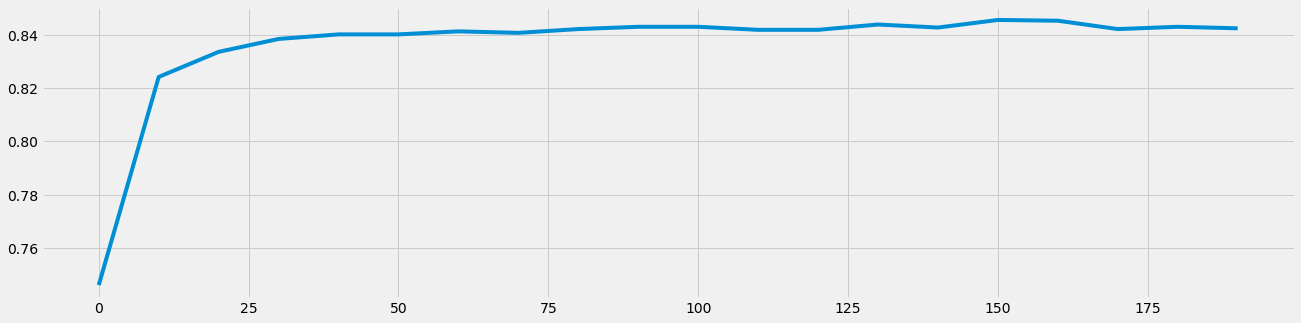

In [18]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1)
    score = cross_val_score(rfc,Xtrain,Ytrain.ravel(),cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(0,200,10),scorel)
plt.show()

In [13]:
random_forest = RandomForestClassifier(n_estimators=151)
random_forest.fit(Xtrain, Ytrain)
Y_pred = random_forest.predict(Xtest)
acc_random_forest = round(random_forest.score(Xtest, Ytest) * 100, 2)
cross_random_forest = cross_val_score(random_forest,Xtrain, Ytrain,cv=10).mean()
print(acc_random_forest)
print(cross_random_forest)

85.07
0.8437142857142857


## KNN

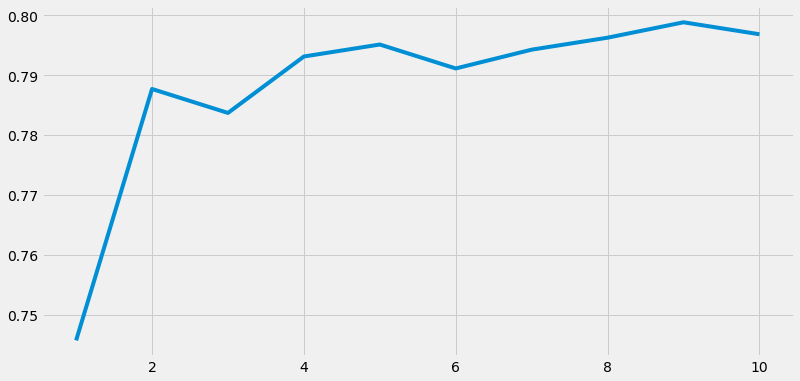

In [32]:
score=[]

for i in list(range(1,11)):
    KNN = KNeighborsClassifier(n_neighbors=i)
    CVS = cross_val_score(KNN,Xtrain,Ytrain,cv=5)   #交叉验证
    score.append(CVS.mean())
    
plt.plot([*range(1,11)],score)  # *range 激活成列表
fig = plt.gcf()
fig.set_size_inches(12,6)

In [14]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(Xtrain, Ytrain)
Y_pred = knn.predict(Xtest)
acc_knn = round(knn.score(Xtest, Ytest) * 100, 2)
cross_knn = cross_val_score(knn,Xtrain, Ytrain,cv=10).mean()
print(acc_knn)
print(cross_knn)

79.67
0.8017142857142858


## 朴素贝叶斯

In [15]:
gaussian = GaussianNB()
gaussian.fit(Xtrain, Ytrain)
Y_pred = gaussian.predict(Xtest)
acc_gaussian = round(gaussian.score(Xtest, Ytest) * 100, 2)
cross_gaussian = cross_val_score(gaussian,Xtrain, Ytrain,cv=10).mean()
print(acc_gaussian)
print(cross_gaussian)

80.27
0.8005714285714287


## 逻辑回归

In [16]:
logreg = LogisticRegression(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)
logreg.fit(Xtrain, Ytrain)
Y_pred = logreg.predict(Xtest)
acc_log = round(logreg.score(Xtest, Ytest) * 100, 2)
cross_log = cross_val_score(logreg,Xtrain, Ytrain,cv=10).mean()
print(acc_log)
print(cross_log) 

84.67
0.836


## SVM

In [37]:
from time import time #随时监控我们的模型的运行时间
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [38]:
times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控我们的模型运行时间
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 2000 #设定越大，代表允许我们的算法使用越多的内存来进行计算
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest) #获取模型的预测结果
    score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.844000, recall is 0.469388', auc is 0.869029
00:00:993346
poly 's testing accuracy 0.840667, recall is 0.457726', auc is 0.868157
00:01:381279
rbf 's testing accuracy 0.813333, recall is 0.306122', auc is 0.814873
00:02:778570
sigmoid 's testing accuracy 0.655333, recall is 0.154519', auc is 0.437308
00:03:362008


In [17]:
clf = SVC(kernel = "linear"
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 2000 #设定越大，代表允许我们的算法使用越多的内存来进行计算
             ).fit(Xtrain, Ytrain)
score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
acc_svm = round(score * 100, 2)
cross_svm = cross_val_score(clf,Xtrain, Ytrain,cv=10).mean()
print(acc_svm)
print(cross_svm)

84.4
0.8348571428571429


## 评价

In [18]:
models = pd.DataFrame({
    'Model': [ 'KNN','Logistic Regression','GaussianNB',
              'Random Forest','Decision Tree','SVM'],
    'Score': [acc_knn,acc_log,acc_gaussian,
              acc_random_forest,acc_decision_tree,acc_svm]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.07
1,Logistic Regression,84.67
5,SVM,84.40
4,Decision Tree,82.20
2,GaussianNB,80.27
0,KNN,79.67
